In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
data= pd.read_csv('Customer Churn.csv')
pd.pandas.set_option('display.max_columns',None)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: ylabel='Churn'>

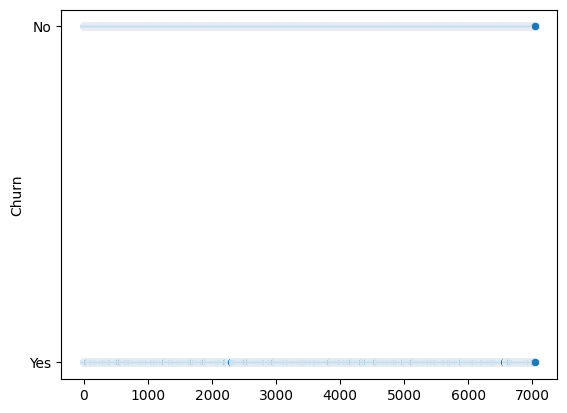

In [4]:
sns.scatterplot(data['Churn']) #Check for linearity in categories such that it is linearly separable

In [5]:
LE=LabelEncoder()
data['Churn']=LE.fit_transform(data['Churn'])

In [6]:
from sklearn.model_selection import train_test_split
x= data.drop(columns=['Churn'])
y=data['Churn']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

<Axes: xlabel='Churn', ylabel='count'>

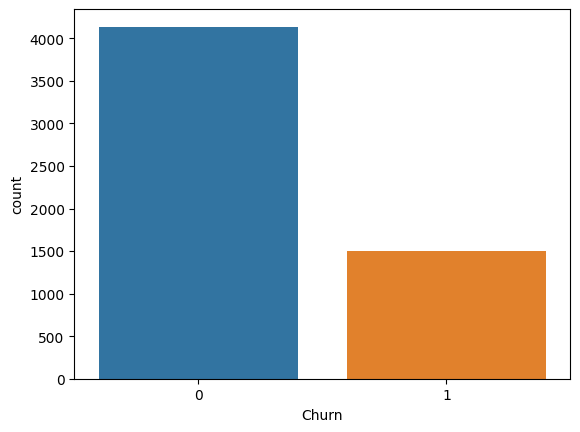

In [7]:
sns.countplot(x=y_train) #imbalanced dataset

<Axes: ylabel='Churn'>

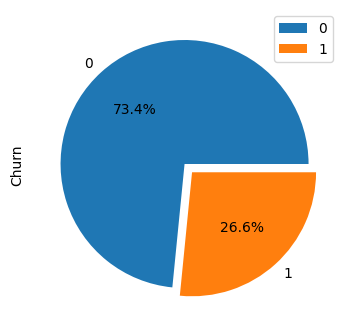

In [8]:
y_train.value_counts().plot(kind='pie',explode=[0,0.09],autopct='%1.1f%%', legend=True,figsize= (4,8))

### EDA

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 5020 to 2038
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

### Type Conversion

In [10]:
X_train['TotalCharges'].unique()

array(['810.45', '45.7', '5662.25', ..., '3527.3', '3845.45', '2361.8'],
      dtype=object)

In [11]:
X_train['TotalCharges']=pd.to_numeric(X_train['TotalCharges'],errors='coerce') # 7 missing values
X_test['TotalCharges']=pd.to_numeric(X_test['TotalCharges'],errors='coerce')

In [12]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

<ipython-input-13-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

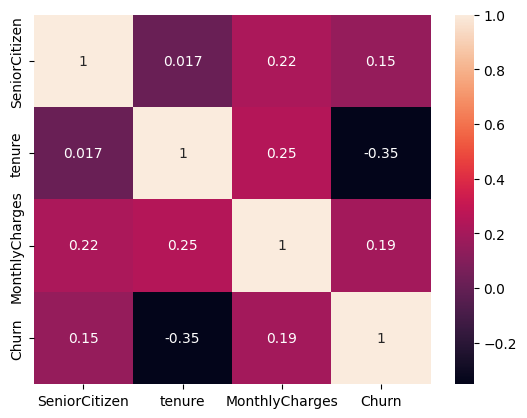

In [13]:
sns.heatmap(data.corr(),annot=True)

### Categorical Variables

In [14]:
X_train= X_train.drop(columns=['customerID'])
X_test= X_test.drop(columns=['customerID'])

In [15]:
cat_var= [x for x in X_train.columns if X_train[x].dtypes =='O']

In [16]:
cat_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Univariate Analaysis:


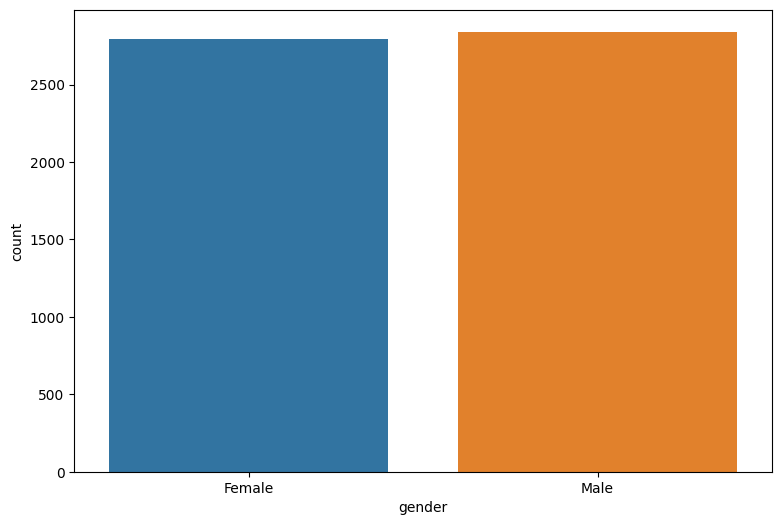

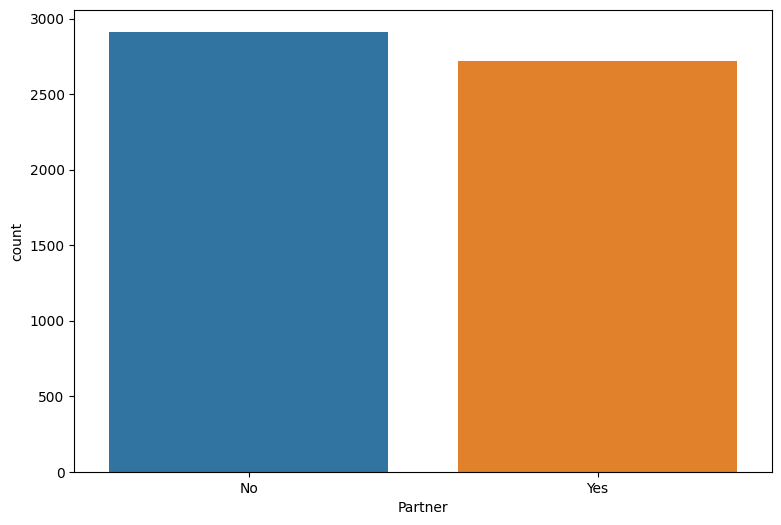

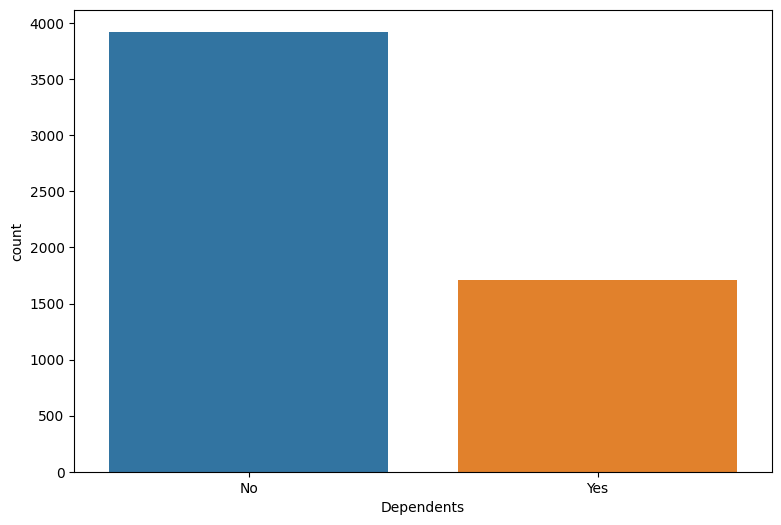

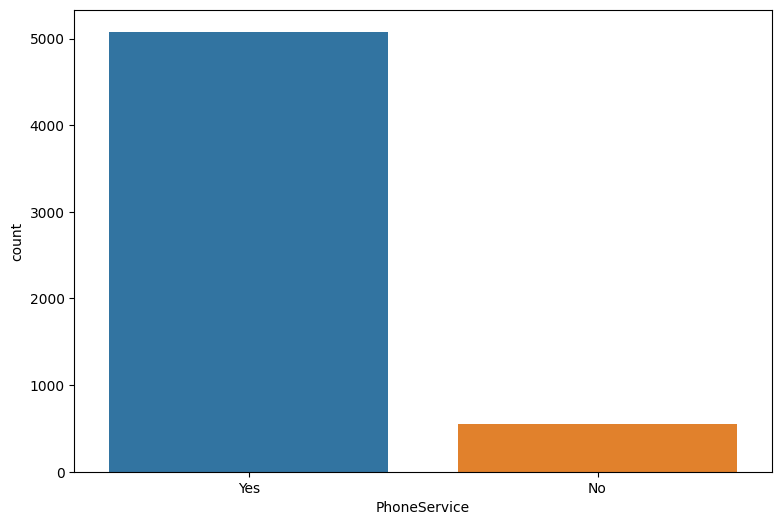

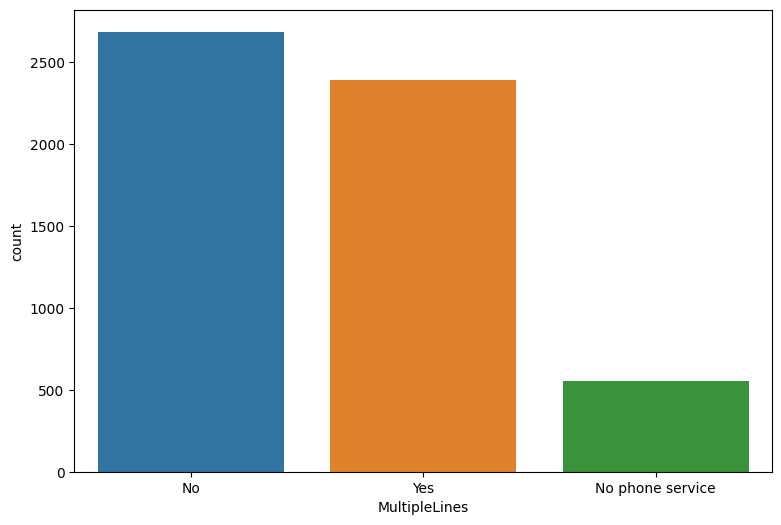

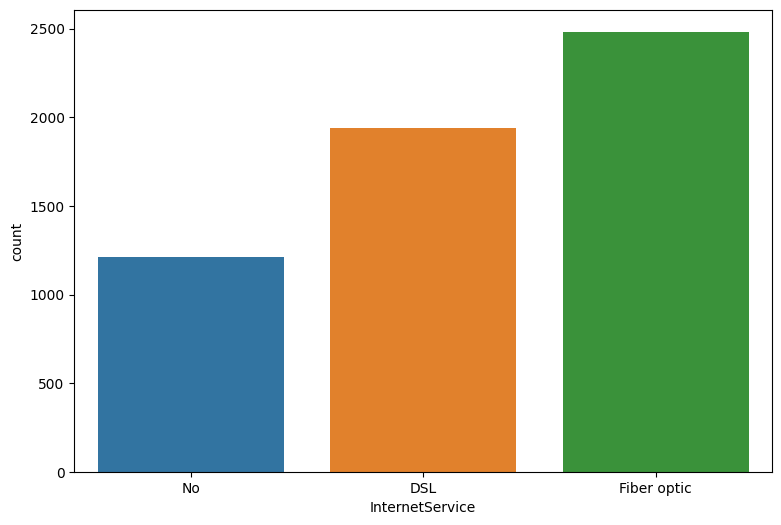

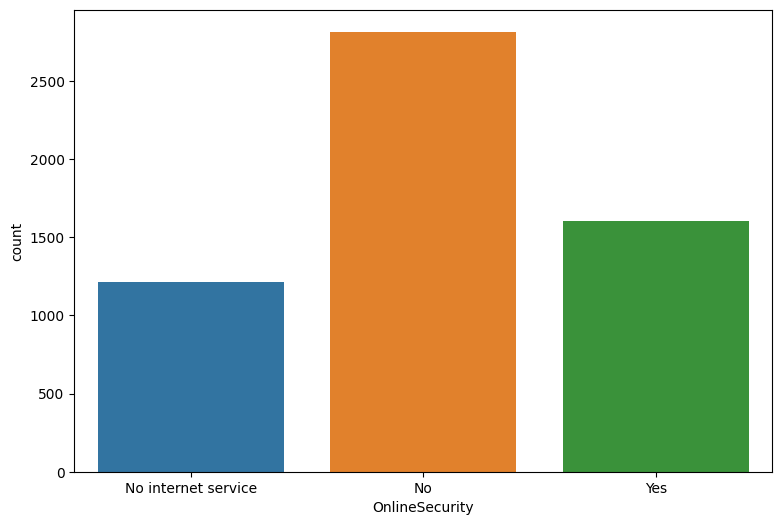

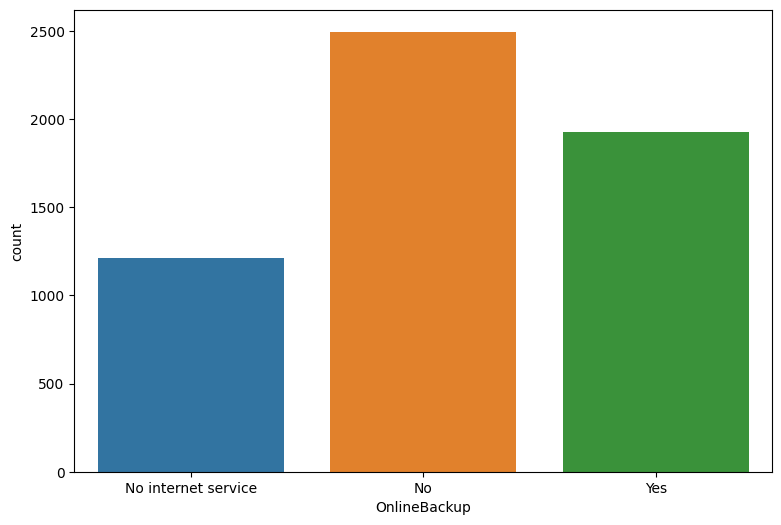

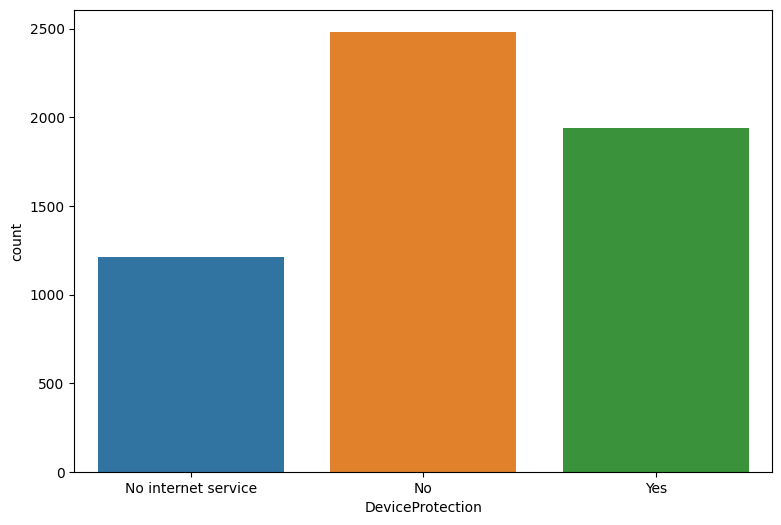

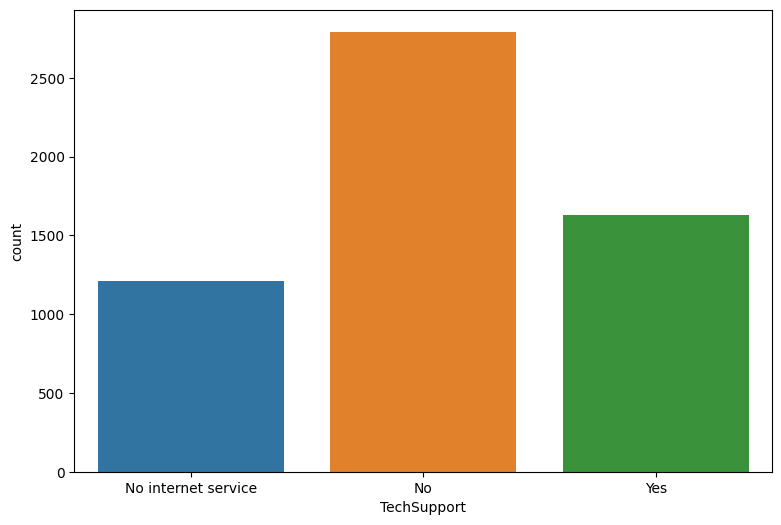

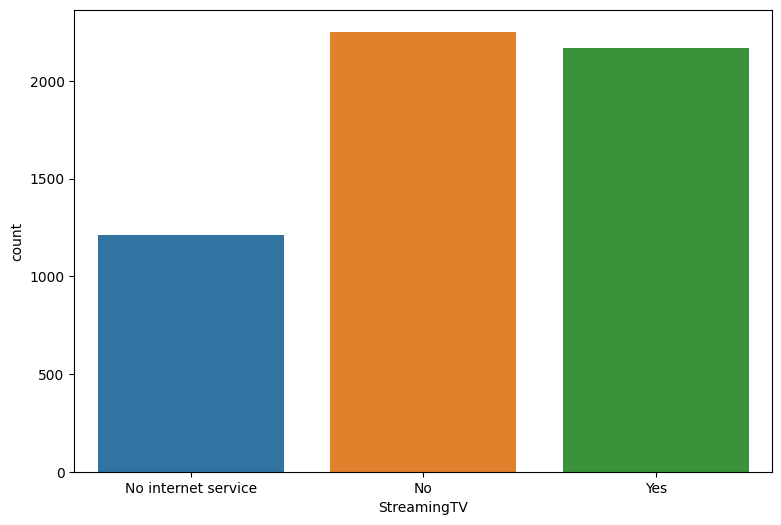

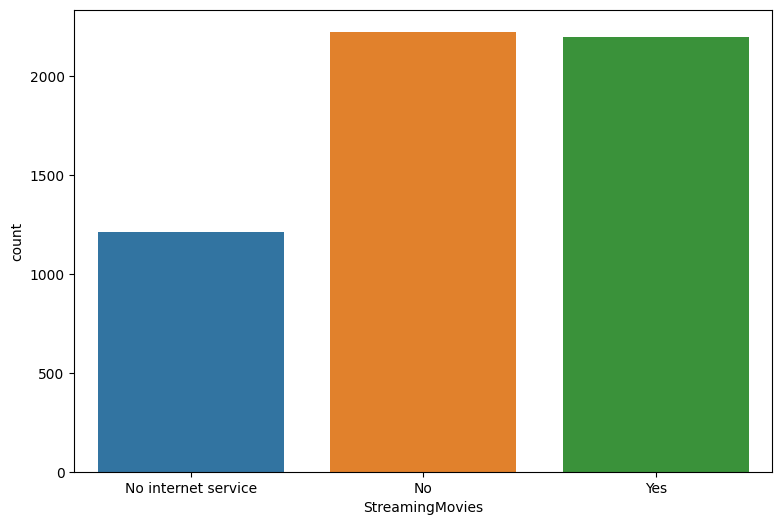

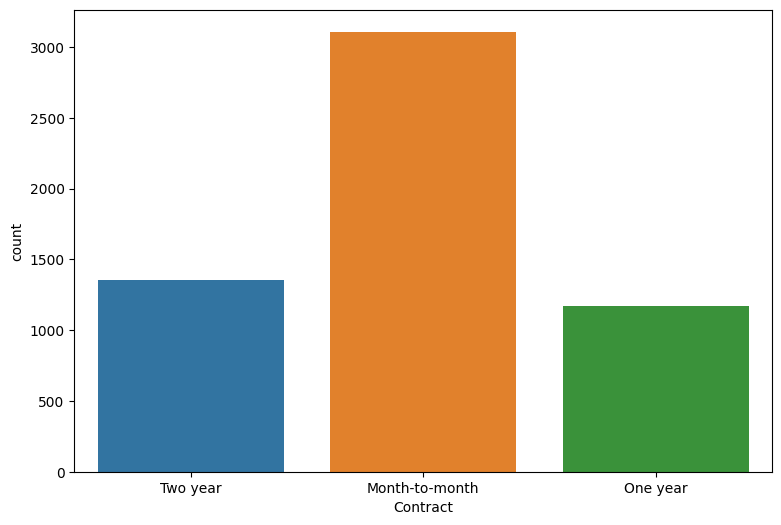

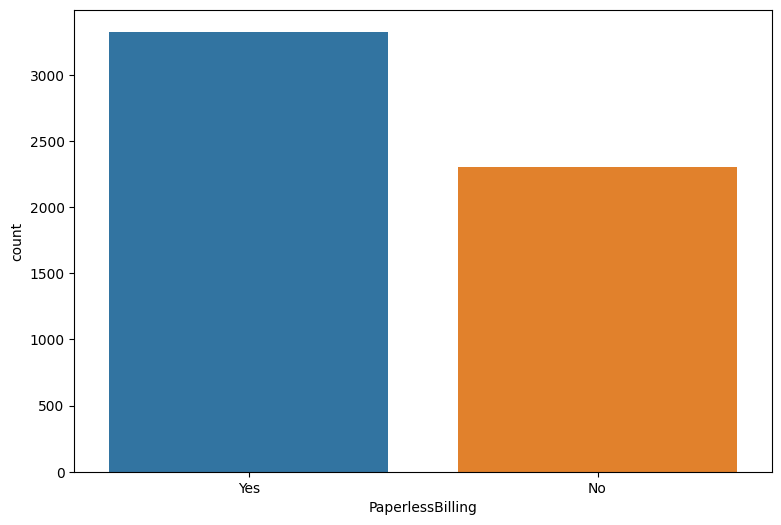

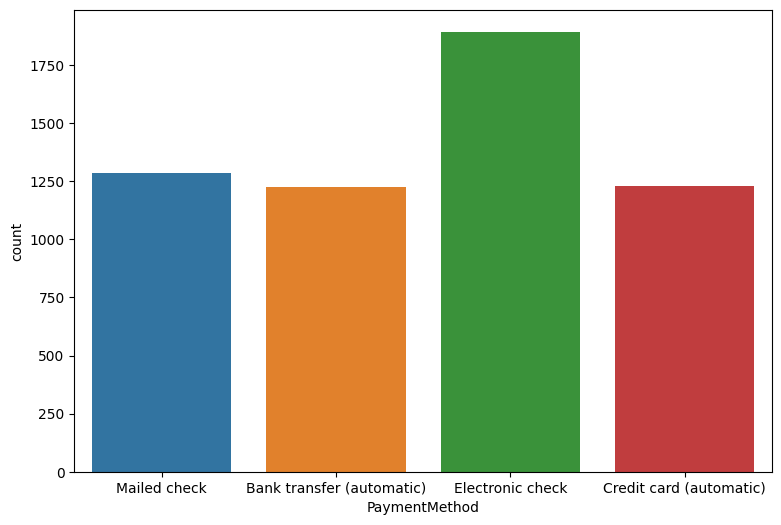

In [17]:
def plot_var(x):
    for i in x:
      plt.figure(figsize=(9,6))
      sns.countplot(x=X_train[i])
      plt.show()
plot_var(cat_var)



### Numeric Variables:

In [18]:
num_var= [x for x in X_train.columns if X_train[x].dtypes !='O']

In [19]:
num_var # y_train = 'Churn'  #percentage of customers that stopped using your product or service

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<ipython-input-20-813af0a5e6f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[i])


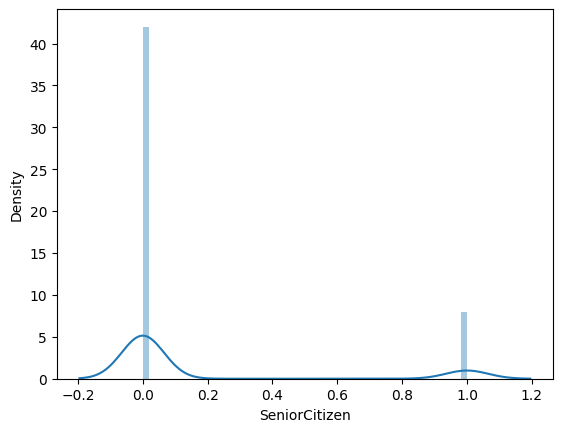

<ipython-input-20-813af0a5e6f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[i])


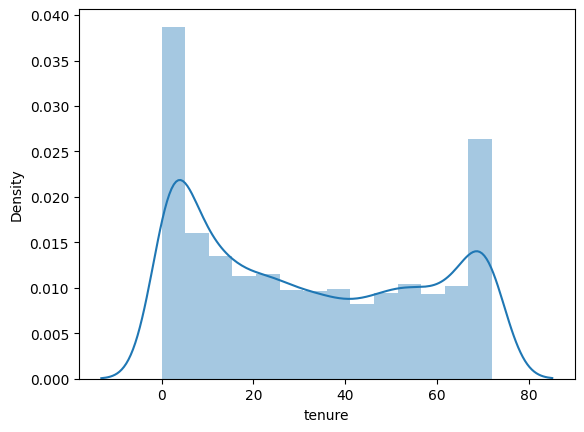

<ipython-input-20-813af0a5e6f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[i])


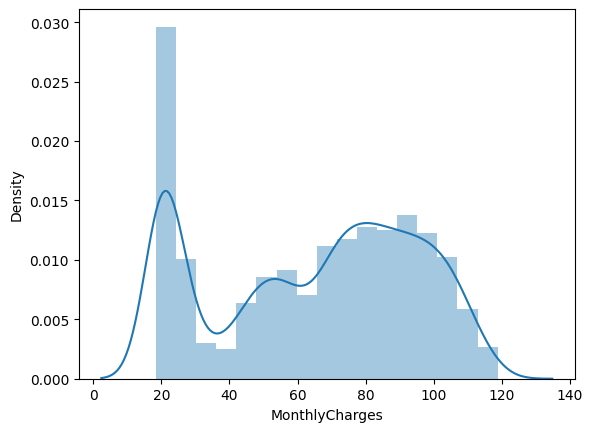

<ipython-input-20-813af0a5e6f7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[i])


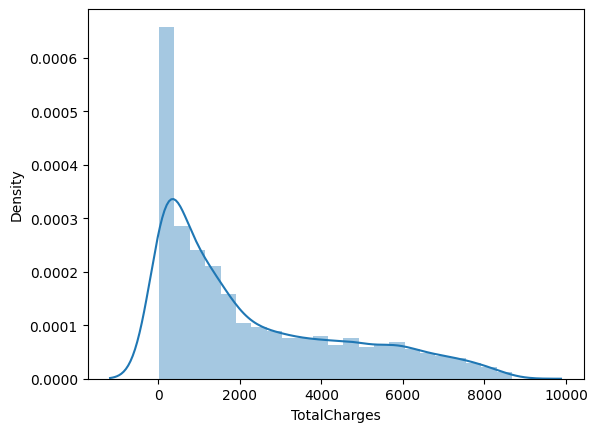

In [20]:
def plots(x):                  #work needed on monthly charges , total charges (transformation)
  for i in x:                 #work needed on tenure, seniorcitizen(int64) might use box cox transformation
    sns.distplot(X_train[i])
    plt.show()
plots(num_var)

### Bivariate Analysis:

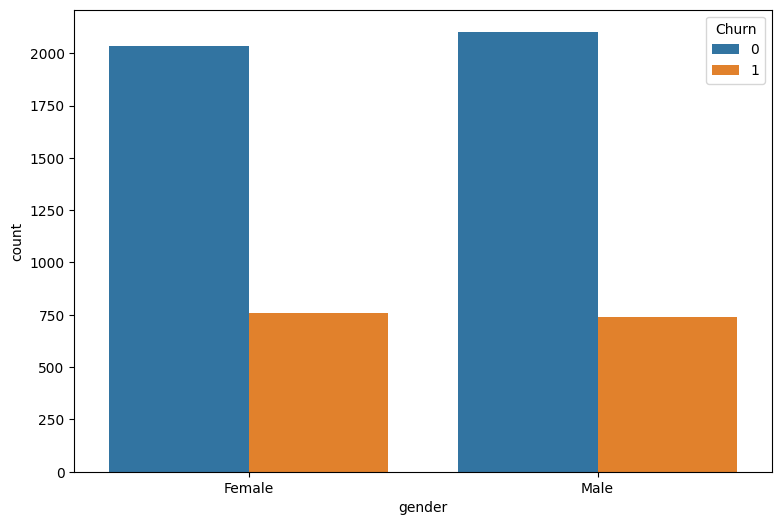

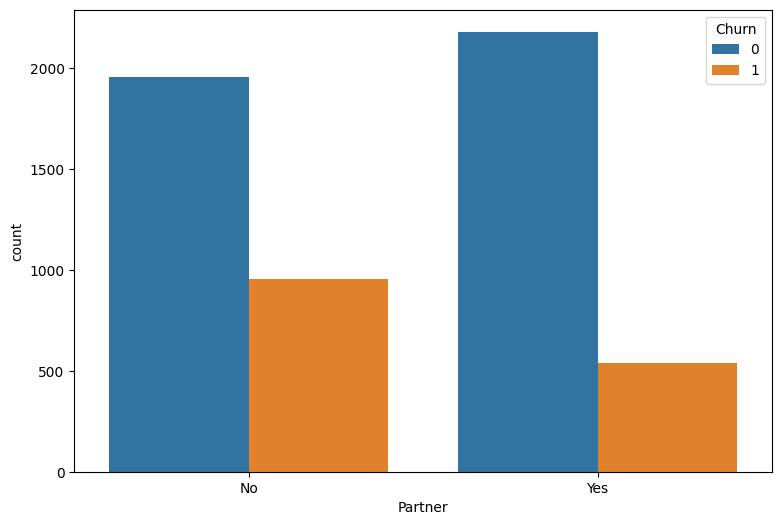

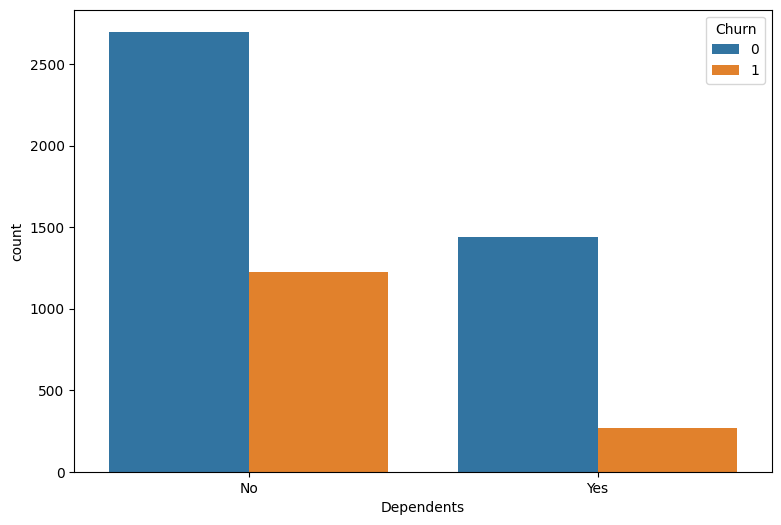

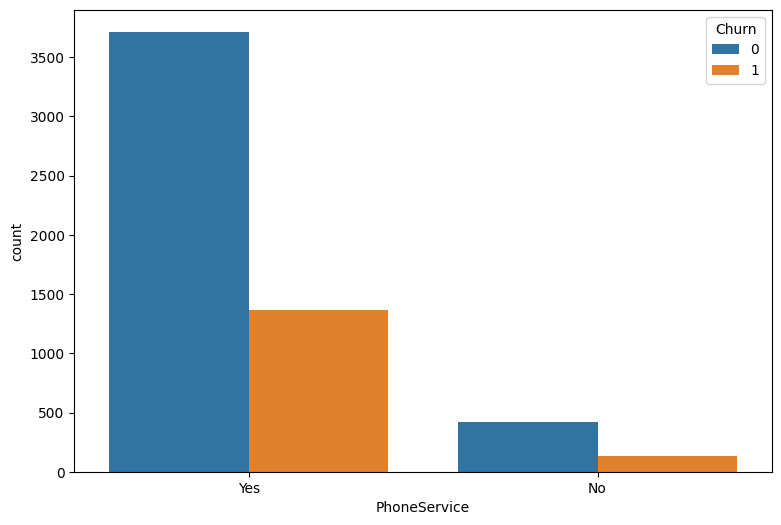

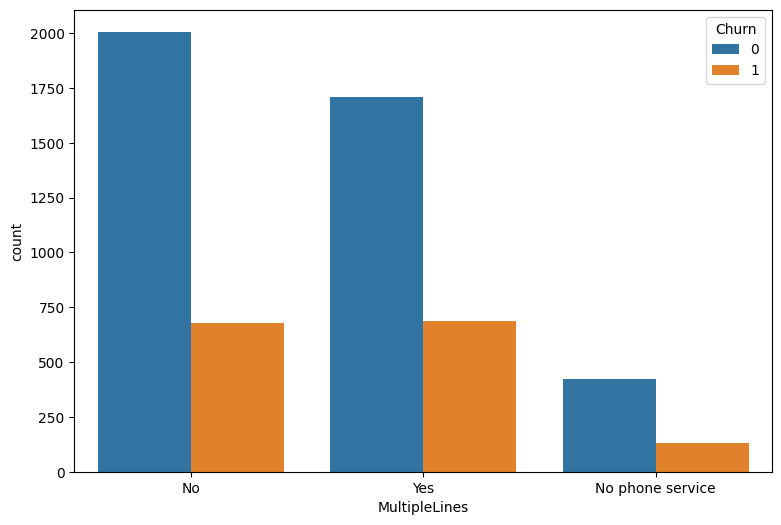

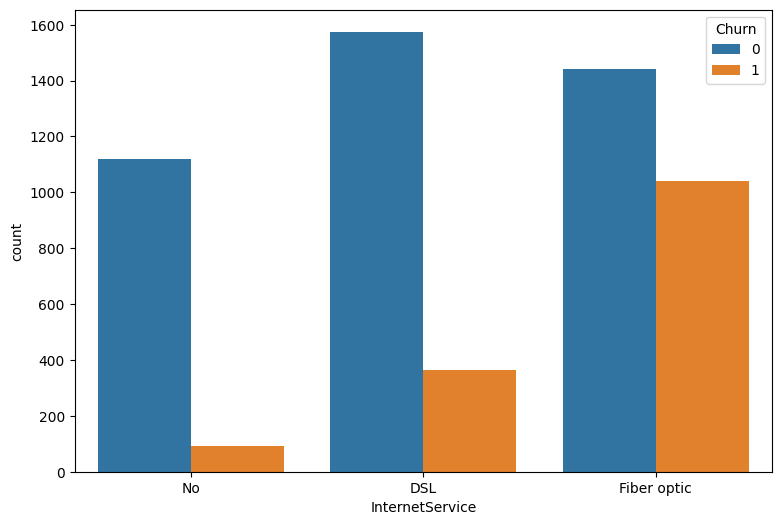

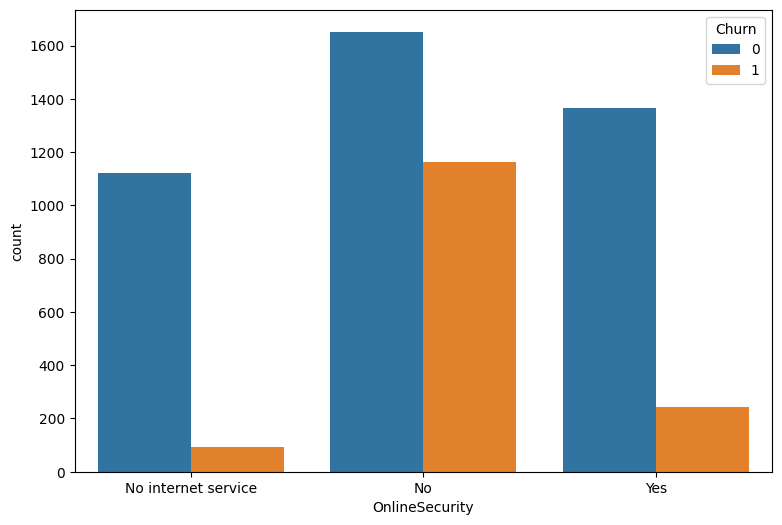

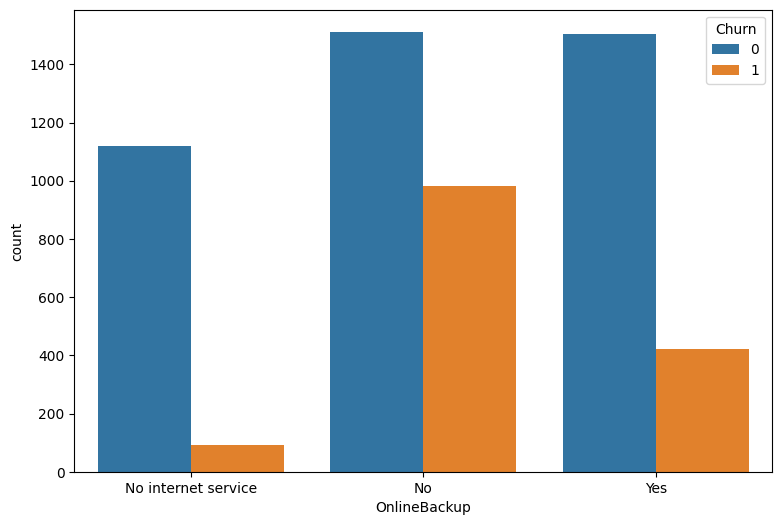

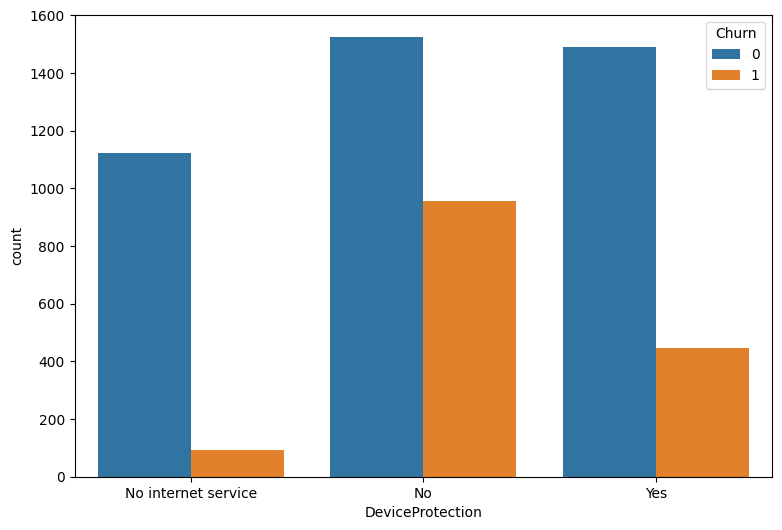

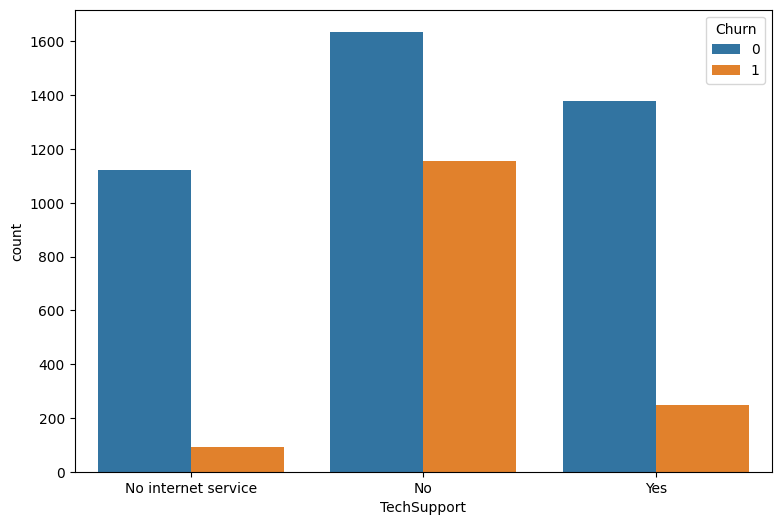

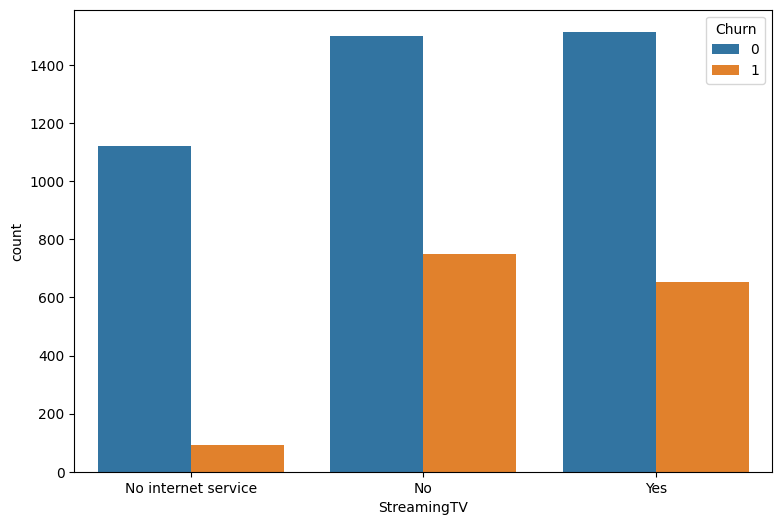

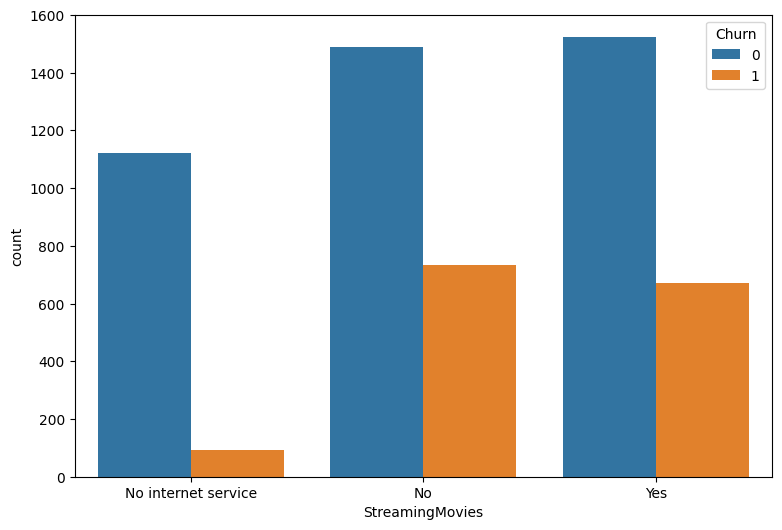

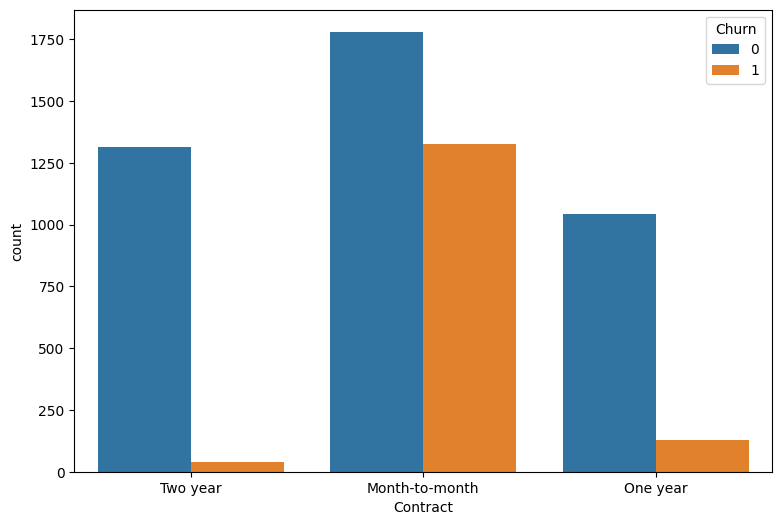

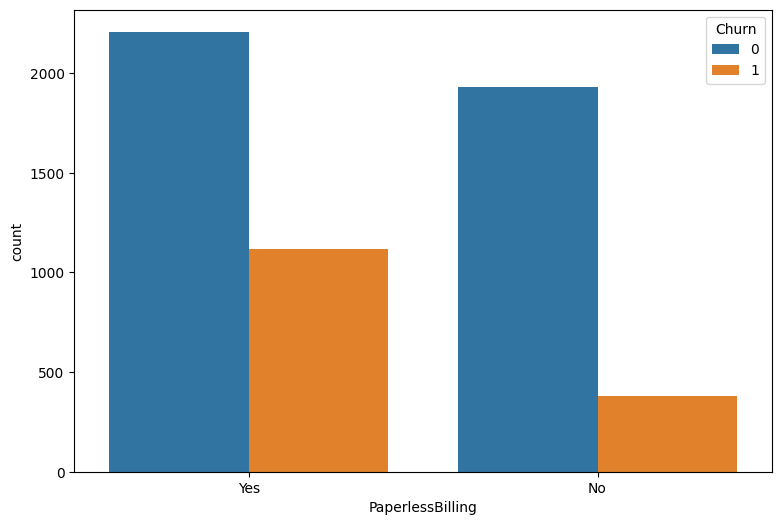

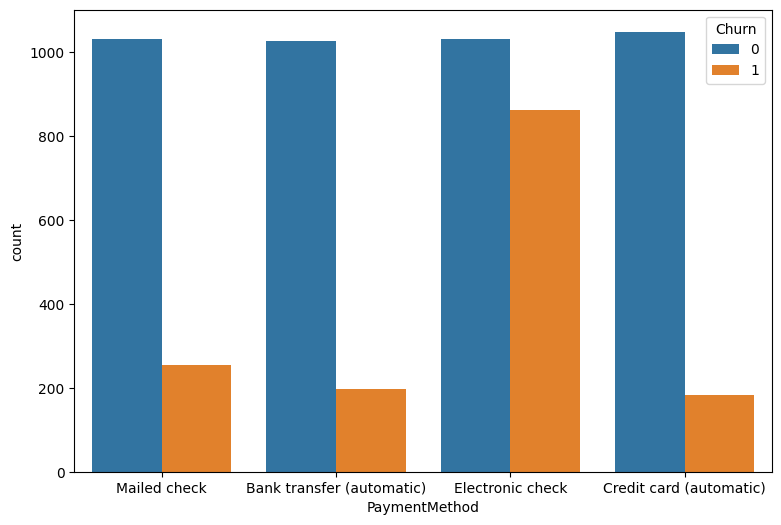

In [21]:
def bivar(x,y):
  for i in x:
      plt.figure(figsize=(9,6))
      sns.countplot(x=X_train[i],hue=y_train)
      plt.show()
bivar(cat_var,y_train)


<Axes: ylabel='PaymentMethod'>

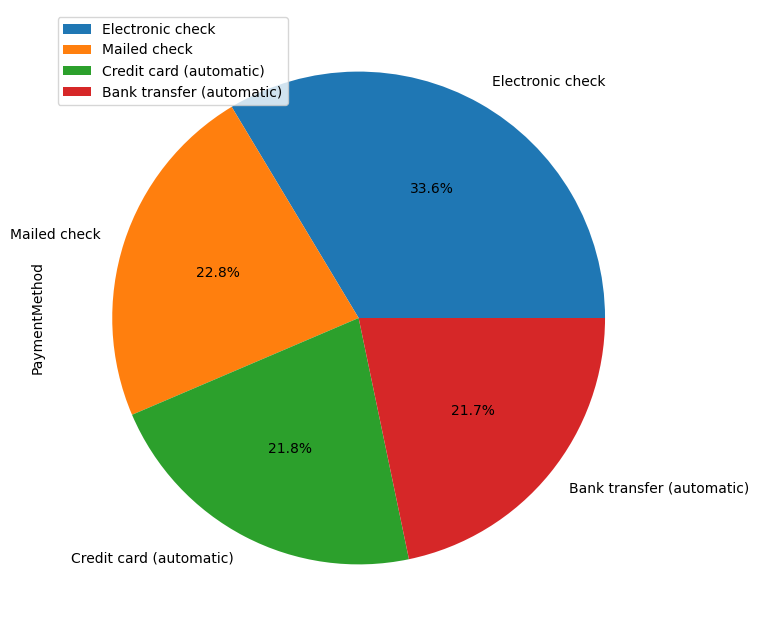

In [22]:
X_train['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.1f%%', legend=True,figsize= (8,8))

In [23]:
data.groupby('Contract')['Churn'].value_counts(normalize=True) #same can be followed for other columns


Contract        Churn
Month-to-month  0        0.572903
                1        0.427097
One year        0        0.887305
                1        0.112695
Two year        0        0.971681
                1        0.028319
Name: Churn, dtype: float64

### Handling Missing values

In [24]:
X_train['TotalCharges']= X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
X_test['TotalCharges']= X_test['TotalCharges'].fillna(X_test['TotalCharges'].median())

In [25]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

### Encoding

In [26]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [27]:
transformer= ColumnTransformer(transformers=[
                    ('trf1',OneHotEncoder(sparse=False,drop='first'),[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16])],remainder='passthrough')
transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16])])

In [28]:
X_train_transformed1= transformer.fit_transform(X_train)
X_test_transformed1= transformer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
X_train_transformed1

,trf1__gender_Male,trf1__Partner_Yes,trf1__Dependents_Yes,trf1__PhoneService_Yes,trf1__MultipleLines_No phone service,trf1__MultipleLines_Yes,trf1__InternetService_Fiber optic,trf1__InternetService_No,trf1__OnlineSecurity_No internet service,trf1__OnlineSecurity_Yes,trf1__OnlineBackup_No internet service,trf1__OnlineBackup_Yes,trf1__DeviceProtection_No internet service,trf1__DeviceProtection_Yes,trf1__TechSupport_No internet service,trf1__TechSupport_Yes,trf1__StreamingTV_No internet service,trf1__StreamingTV_Yes,trf1__StreamingMovies_No internet service,trf1__StreamingMovies_Yes,trf1__Contract_One year,trf1__Contract_Two year,trf1__PaperlessBilling_Yes,trf1__PaymentMethod_Credit card (automatic),trf1__PaymentMethod_Electronic check,trf1__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__MonthlyCharges,remainder__TotalCharges
5020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,41,19.85,810.45
646,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,45.70,45.70
2595,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,71,80.45,5662.25
4453,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,10,98.50,1037.75
2427,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,35.90,35.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,69,19.75,1375.40
674,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,52,49.15,2550.90
4867,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,34,100.85,3527.30
6624,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,64,60.05,3845.45


### Performing Quantile Binning

In [30]:
data['tenure'].unique()   #min->0 , max->72

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [31]:
k_bins_tenure=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [32]:
trf= ColumnTransformer(transformers=[
                    ('t1',k_bins_tenure,[27])],remainder='passthrough')

trf.set_output(transform="pandas")
X_train_transformed1= trf.fit_transform(X_train_transformed1)
X_test_transformed1= trf.transform(X_test_transformed1)



### Distribution logarithmic

In [33]:
#YE0-JOHNSON it is by default
pt= PowerTransformer(method='box-cox').set_output(transform='pandas')
X_train_transformed2= pt.fit_transform(X_train_transformed1+0.000001)
X_test_transformed2= pt.transform(X_test_transformed1+0.000001)

In [34]:
X_train_transformed2

,t1__remainder__tenure,remainder__trf1__gender_Male,remainder__trf1__Partner_Yes,remainder__trf1__Dependents_Yes,remainder__trf1__PhoneService_Yes,remainder__trf1__MultipleLines_No phone service,remainder__trf1__MultipleLines_Yes,remainder__trf1__InternetService_Fiber optic,remainder__trf1__InternetService_No,remainder__trf1__OnlineSecurity_No internet service,remainder__trf1__OnlineSecurity_Yes,remainder__trf1__OnlineBackup_No internet service,remainder__trf1__OnlineBackup_Yes,remainder__trf1__DeviceProtection_No internet service,remainder__trf1__DeviceProtection_Yes,remainder__trf1__TechSupport_No internet service,remainder__trf1__TechSupport_Yes,remainder__trf1__StreamingTV_No internet service,remainder__trf1__StreamingTV_Yes,remainder__trf1__StreamingMovies_No internet service,remainder__trf1__StreamingMovies_Yes,remainder__trf1__Contract_One year,remainder__trf1__Contract_Two year,remainder__trf1__PaperlessBilling_Yes,remainder__trf1__PaymentMethod_Credit card (automatic),remainder__trf1__PaymentMethod_Electronic check,remainder__trf1__PaymentMethod_Mailed check,remainder__remainder__SeniorCitizen,remainder__remainder__MonthlyCharges,remainder__remainder__TotalCharges
5020,0.575609,-1.008914,-0.966483,-0.660136,0.330235,-0.330235,-0.859586,-0.887696,1.909105,1.909105,-0.631434,1.909105,-0.720706,1.909105,-0.724121,1.909105,-0.637488,1.909105,-0.791185,1.909105,-0.799214,-0.512782,1.779652,0.832717,-0.528755,-0.711630,1.839684,-0.436309,-1.517955,-0.358465
646,-2.437066,0.991164,-0.966483,-0.660136,0.330235,-0.330235,-0.859586,-0.887696,-0.523806,-0.523806,-0.631434,-0.523806,-0.720706,-0.523806,-0.724121,-0.523806,-0.637488,-0.523806,-0.791185,-0.523806,-0.799214,-0.512782,-0.561908,0.832717,-0.528755,-0.711630,1.839684,-0.436309,-0.618032,-1.683699
2595,1.117441,-1.008914,1.034680,-0.660136,0.330235,-0.330235,1.163350,-0.887696,-0.523806,-0.523806,-0.631434,-0.523806,-0.720706,-0.523806,1.380985,-0.523806,1.568658,-0.523806,1.263927,-0.523806,1.251229,-0.512782,1.779652,0.832717,-0.528755,-0.711630,-0.543572,-0.436309,0.531205,1.282256
4453,-0.512996,0.991164,1.034680,-0.660136,0.330235,-0.330235,1.163350,1.126512,-0.523806,-0.523806,-0.631434,-0.523806,-0.720706,-0.523806,1.380985,-0.523806,-0.637488,-0.523806,1.263927,-0.523806,1.251229,-0.512782,-0.561908,0.832717,-0.528755,1.405225,-0.543572,-0.436309,1.111833,-0.192258
2427,-2.437066,0.991164,-0.966483,-0.660136,-3.028147,3.028147,-0.859586,-0.887696,-0.523806,-0.523806,-0.631434,-0.523806,-0.720706,-0.523806,-0.724121,-0.523806,-0.637488,-0.523806,-0.791185,-0.523806,1.251229,-0.512782,-0.561908,-1.200888,-0.528755,1.405225,-0.543572,-0.436309,-0.952839,-1.756677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.117441,-1.008914,1.034680,1.514839,0.330235,-0.330235,-0.859586,-0.887696,1.909105,1.909105,-0.631434,1.909105,-0.720706,1.909105,-0.724121,1.909105,-0.637488,1.909105,-0.791185,1.909105,-0.799214,-0.512782,1.779652,-1.200888,-0.528755,-0.711630,-0.543572,-0.436309,-1.521565,0.010404
674,0.771138,0.991164,-0.966483,-0.660136,-3.028147,3.028147,-0.859586,-0.887696,-0.523806,-0.523806,-0.631434,-0.523806,1.387528,-0.523806,-0.724121,-0.523806,-0.637488,-0.523806,1.263927,-0.523806,1.251229,-0.512782,-0.561908,0.832717,-0.528755,1.405225,-0.543572,2.291954,-0.501538,0.509477
4867,0.359647,0.991164,1.034680,-0.660136,0.330235,-0.330235,1.163350,1.126512,-0.523806,-0.523806,-0.631434,-0.523806,-0.720706,-0.523806,1.380985,-0.523806,-0.637488,-0.523806,1.263927,-0.523806,1.251229,-0.512782,-0.561908,-1.200888,-0.528755,1.405225,-0.543572,-0.436309,1.186794,0.804666
6624,0.950723,0.991164,1.034680,1.514839,-3.028147,3.028147,-0.859586,-0.887696,-0.523806,-0.523806,1.583697,-0.523806,-0.720706,-0.523806,1.380985,-0.523806,1.568658,-0.523806,1.263927,-0.523806,1.251229,-0.512782,1.779652,0.832717,-0.528755,-0.711630,-0.543572,-0.436309,-0.137391,0.887547


### Feature Scaling

In [36]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed2)
X_test_scaled= scaler.transform(X_test_transformed2)

### Applying ML algo

In [37]:
LR=LogisticRegression(C=0.08,max_iter=100)
LR.fit(X_train_scaled,y_train)
y_pred_LR= LR.predict(X_test_scaled)

In [38]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR))
print("Recall:", recall_score(y_test, y_pred_LR))
print("F1-score:", f1_score(y_test, y_pred_LR))
print()

Logistic Regression:
Accuracy: 0.801277501774308
Precision: 0.6742424242424242
Recall: 0.478494623655914
F1-score: 0.5597484276729559



In [39]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(X_train_scaled,y_train)
y_pred2= LR.predict(X_test_scaled)
accuracy_score(y_test,y_pred2)

0.801277501774308

In [40]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1-score:", f1_score(y_test, y_pred2))
print()

Decision Tree:
Accuracy: 0.801277501774308
Precision: 0.6742424242424242
Recall: 0.478494623655914
F1-score: 0.5597484276729559

